Cars found:  9


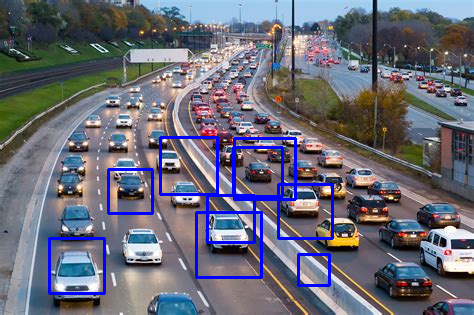

In [ ]:
from PIL import Image
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow as cv_imshow

img = cv2.imread('car1.jpeg')
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv_imshow(img)

imgBlur = cv2.GaussianBlur(imgGrey, (7,7), cv2.BORDER_DEFAULT)
#cv_imshow(imgBlur)

imgDilated = cv2.dilate(imgBlur, np.ones((4,4)))
#cv_imshow(imgDilated)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
imgFinal = cv2.morphologyEx(imgDilated, cv2.MORPH_CLOSE, kernel)

carsXML = cv2.CascadeClassifier('cars.xml')
cars = carsXML.detectMultiScale(imgFinal, 1.25, 1)

count = 0
for (x,y,w,h) in cars:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  count+=1
print("Cars found: ", count)
cv_imshow(img)